In [1]:
import numpy as np
import networkx as nx
import sys
import seaborn as sns
import matplotlib.pyplot as plt
sys.path.insert(0, 'C:/Users/User/Code/MMDGraph')
sys.path.insert(0, 'C:/Users/User/Code/MMDGraph/MMDGraph/')
import kernels.RandomWalk as rw
import MMD
import glasso

# Test kernel

In [2]:
n1 = n2 = 50
g1 = [nx.fast_gnp_random_graph(30,0.1) for _ in range(n1)]
g2 = [nx.fast_gnp_random_graph(30,0.1) for _ in range(n2)]
for j in range(len(g1)):
    nx.set_node_attributes(g1[j], dict( ( (i, np.random.normal(loc = 0, scale = 0.1, size = (1,))) for i in range(len(g1[j])) ) ), 'attr')
for j in range(len(g2)):
    nx.set_node_attributes(g2[j], dict( ( (i, np.random.normal(loc = 0, scale = 0.1, size = (1,))) for i in range(len(g2[j])) ) ), 'attr')
g1[0].nodes('asdf')

NodeDataView({0: None, 1: None, 2: None, 3: None, 4: None, 5: None, 6: None, 7: None, 8: None, 9: None, 10: None, 11: None, 12: None, 13: None, 14: None, 15: None, 16: None, 17: None, 18: None, 19: None, 20: None, 21: None, 22: None, 23: None, 24: None, 25: None, 26: None, 27: None, 28: None, 29: None}, data='asdf')

Fit random walk kernel when H0 true

In [6]:
n1 = n2 = 50

rw_kernel = rw.RandomWalk(g1+g2, r = 4,c = 0.01)
rw_kernel.fit(calc_type = "ARKU_plus", verbose = True)

pval = MMD.BoostrapMethods(list_of_functions=[MMD.MMD_u], function_arguments={'MMD_u':dict(n1=n1, n2=n2)})
pval.Bootstrap(rw_kernel.K, 100)
pval.p_values

100%|██████████| 5050/5050.0 [00:00<00:00, 5428.89it/s]


{'MMD_u': 0.99}

In [10]:
n1 = n2 = 50
g1 = [nx.fast_gnp_random_graph(30,0.1) for _ in range(n1)]
g2 = [nx.fast_gnp_random_graph(30,0.1) for _ in range(n2)]

rw_kernel = rw.RandomWalk(g1+g2, r = 3,c = 0.01)
rw_kernel.fit(calc_type = "ARKU_plus", verbose = True)

pval = MMD.BoostrapMethods(list_of_functions=[MMD.MMD_u], function_arguments={'MMD_u':dict(n1=n1, n2=n2)})
pval.Bootstrap(rw_kernel.K, 100)
pval.p_values

100%|██████████| 5050/5050.0 [00:00<00:00, 6540.04it/s]


{'MMD_u': 0.74}

# Fit when H1 true

In [2]:

n1 = n2 = 50
g1 = [nx.fast_gnp_random_graph(30,0.1) for _ in range(n1)]
g2 = [nx.fast_gnp_random_graph(30,0.2) for _ in range(n2)]
for j in range(len(g1)):
    nx.set_node_attributes(g1[j], dict( ( (i, np.random.normal(loc = 0, scale = 0.1, size = (1,))) for i in range(len(g1[j])) ) ), 'attr')
for j in range(len(g2)):
    nx.set_node_attributes(g2[j], dict( ( (i, np.random.normal(loc = 0, scale = 0.1, size = (1,))) for i in range(len(g2[j])) ) ), 'attr')
for j in range(len(g1)):
    nx.set_node_attributes(g1[j],  {key: str(value) for key, value in dict(g1[j].degree).items()} , 'label')
for j in range(len(g2)):
    nx.set_node_attributes(g2[j], {key: str(value) for key, value in dict(g2[j].degree).items()}, 'label')

# MMD_out = MMD.MMD()
# MMD_out.fit(G1 = g1, G2 = g2, kernel = 'RW_ARKU_plus', mmd_estimators = 'MMD_u', r = 2, c = 0.01)
# print(MMD_out.p_values)

# MMD_out = MMD.MMD()
# MMD_out.fit(G1 = g1, G2 = g2, kernel = 'GNTK', mmd_estimators = 'MMD_u', num_layers = 2, num_mlp_lauers = 2, jk = True, scale = 'uniform')
# print(MMD_out.p_values)

# MMD_out = MMD.MMD()
# MMD_out.fit(G1 = g1, G2 = g2, kernel = 'WWL', mmd_estimators = 'MMD_u', discount = 0.1, h = 2, node_label = 'label')
# print(MMD_out.p_values)


kernel = [{"name": "weisfeiler_lehman", "n_iter": 1}, {"name": "vertex_histogram"}]
MMD_out = MMD.MMD()
MMD_out.fit(G1 = g1, G2 = g2, kernel = kernel, mmd_estimators = 'MMD_u', discount = 0.1, h = 2, node_label = 'label')
print(MMD_out.p_values)




Using label as node labels
{'MMD_u': 0.0}


Fit when H0 true

In [ ]:
self.

In [12]:

n1 = n2 = 50
g1 = [nx.fast_gnp_random_graph(30,0.1) for _ in range(n1)]
g2 = [nx.fast_gnp_random_graph(30,0.1) for _ in range(n2)]


MMD_out = MMD.MMD()
MMD_out.fit(G1 = g1, G2 = g2, kernel = 'RW_ARKU_plus', mmd_estimators = ['MMD_u', 'MMD_l'], r = 2, c = 0.01)
MMD_out.p_values


{'MMD_u': 0.021, 'MMD_l': 0.389}

<AxesSubplot:>

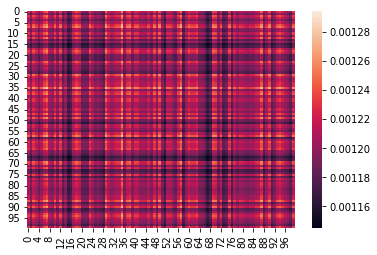

In [13]:
sns.heatmap(rw_kernel.K)

# random test

In [6]:
true_cov = np.array([[0.8, 0.0, 0.2, 0.0],
                      [0.0, 0.4, 0.0, 0.0],
                      [0.2, 0.0, 0.3, 0.1],
                      [0.0, 0.0, 0.1, 0.7]])
X = np.random.multivariate_normal(np.zeros(4),true_cov, size = 500)
np.var(X,axis = 0)

array([0.68088889, 0.3552771 , 0.2762366 , 0.70857636])

In [7]:
out = glasso.glasso_wrapper(alpha =np.exp(np.linspace(-10,1,100)), beta = 0.5, nonparanormal=True ).fit(X)

47


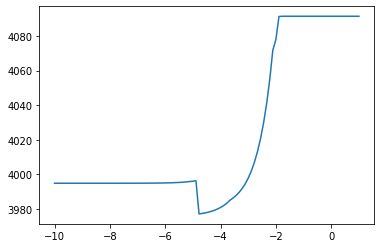

In [8]:
print(out.best_index)
plt.plot(np.log(out.alpha), out.ebic_vals)

In [9]:
out.covariance_

array([[0.65192444, 0.        , 0.15039133, 0.03606201],
       [0.        , 0.34016391, 0.        , 0.        ],
       [0.15039133, 0.        , 0.26448572, 0.12466011],
       [0.03606201, 0.        , 0.12466011, 0.67843411]])

In [ ]:
out.precision_

In [10]:
out.log_lik(out.emp_mean, true_cov)

-1977.1757362826445

In [11]:
n_edges = np.sum(np.abs(true_cov[np.triu_indices(X.shape[1])]) > 0)
n_edges



6

In [77]:
np.log(X.shape[0])*n_edges + 4*out.beta*np.log(n_edges)

40.87116752898926

In [70]:
out.log_lik(out.emp_mean, out.covariance_)

-2096.7447343364615

In [40]:
np.sum(np.abs(out.covariance_) > 0)

4